# Health Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer # "IterativeImputer" is Dependent on This
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, StandardScaler

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

## Data Collection and Preparation

### Data Summary

**Variables**

1. `age` (Ratio): Age in years
2. `sex` (Nominal):
   - 0: female
   - 1: male
3. `cp` (Nominal): Chest pain type
   - 1: typical angina
   - 2: atypical angina
   - 3: non-anginal pain
   - 4: asymptomatic
4. `trestbps` (Ratio): Resting blood pressure (in mm Hg on admission to the hospital)
5. `chol` (Ratio): Serum cholestoral in mg/dl
6. `fbs` (Nominal): Fasting blood sugar > 120 mg/dl
   - 0: false
   - 1: true
7. `restecg` (Nominal): Resting electrocardiographic results
   - 0: normal
   - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. `thalach` (Ratio): Maximum heart rate achieved
9. `exang` (Nominal): Exercise induced angina
   - 0: no
   - 1: yes
10. `oldpeak` (Ratio): ST depression induced by exercise relative to rest
11. `slope` (Ordinal): Slope of the peak exercise ST segment
    - 1: upsloping
    - 2: flat
    - 3: downsloping
12. `ca` (Ratio): Number of major vessels (0-3) colored by fluoroscopy
13. `thal` (Nominal): Results of a thallium stress test
    - 3: normal
    - 6: fixed defect
    - 7: reversable defect
14. `num` (Ordinal): Diagnosis of heart disease (angiographic disease status)
    - 0: *no heart disease*
    - 1: *stage A* involves risk factors but no structural heart damage
    - 2: *stage B* includes structural damage without symptoms
    - 3: *stage C* involves structural damage and the presence of symptoms
    - 4: *stage D* is end-stage heart failure with severe symptoms that interfere with daily life

### Individual Datasets

- Added `location` variable that tracks where each record originates from.

In [2]:
col_names = ["age", "sex", "cp", "trestbps", "chol", 
             "fbs", "restecg", "thalach", "exang", "oldpeak", 
             "slope", "ca", "thal", "num"]

In [3]:
df_cleveland = pd.read_csv("heart_disease_Datasets/cleveland.data", sep=",")
df_cleveland.columns = col_names
df_cleveland.replace("?", np.nan, inplace=True)
df_cleveland["ca"].replace(9.0, np.nan, inplace=True)
df_cleveland["location"] = "Cleveland"
df_cleveland.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Cleveland
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Cleveland
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Cleveland
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Cleveland
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,Cleveland


In [4]:
df_long_beach = pd.read_csv("heart_disease_Datasets/long_beach.data", sep=",")
df_long_beach.columns = col_names
df_long_beach.replace("?", np.nan, inplace=True)
df_long_beach["ca"].replace(9.0, np.nan, inplace=True)
df_long_beach["location"] = "Long Beach"
df_long_beach.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
0,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0,Long Beach
1,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2,Long Beach
2,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1,Long Beach
3,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0,Long Beach
4,66,1,3,120,0,0,1,120,0,-0.5,1,NaN,NaN,0,Long Beach


In [5]:
df_hungarian = pd.read_csv("heart_disease_Datasets/hungarian.data", sep="\s+")
df_hungarian.columns = col_names
df_hungarian.replace(-9.0, np.nan, inplace=True)
df_hungarian["ca"].replace(9.0, np.nan, inplace=True)
df_hungarian["location"] = "Hungary"
df_hungarian.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
0,49,0,3,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1,Hungary
1,37,1,2,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0,Hungary
2,48,0,4,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3,Hungary
3,54,1,3,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0,Hungary
4,39,1,3,120.0,339.0,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0,Hungary


In [6]:
df_switzerland = pd.read_csv("heart_disease_Datasets/switzerland.data", sep=",")
df_switzerland.columns = col_names
df_switzerland.replace("?", np.nan, inplace=True)
df_switzerland["ca"].replace(9.0, np.nan, inplace=True)
df_switzerland["location"] = "Switzerland"
df_switzerland.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
0,34,1,4,115,0,NaN,NaN,154,0,.2,1,NaN,NaN,1,Switzerland
1,35,1,4,NaN,0,NaN,0,130,1,NaN,NaN,NaN,7,3,Switzerland
2,36,1,4,110,0,NaN,0,125,1,1,2,NaN,6,1,Switzerland
3,38,0,4,105,0,NaN,0,166,0,2.8,1,NaN,NaN,2,Switzerland
4,38,0,4,110,0,0,0,156,0,0,2,NaN,3,1,Switzerland


### Combined Dataset

In [7]:
df_combine = pd.concat([df_cleveland, df_long_beach, df_hungarian, df_switzerland])
df_combine.reset_index(inplace=True)
df_combine.drop("index", axis=1, inplace=True)
df_combine

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Cleveland
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Cleveland
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Cleveland
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Cleveland
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,Cleveland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,70.0,1.0,4.0,115,0,0,1,92,1,0,2,NaN,7,1,Switzerland
912,70.0,1.0,4.0,140,0,1,0,157,1,2,2,NaN,7,3,Switzerland
913,72.0,1.0,3.0,160,0,NaN,2,114,0,1.6,2,2,NaN,0,Switzerland
914,73.0,0.0,3.0,160,0,0,1,121,0,0,1,NaN,3,1,Switzerland


In [8]:
df_combine.info() # Inital Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       916 non-null    float64
 1   sex       916 non-null    float64
 2   cp        916 non-null    float64
 3   trestbps  857 non-null    object 
 4   chol      886 non-null    object 
 5   fbs       827 non-null    object 
 6   restecg   914 non-null    object 
 7   thalach   861 non-null    object 
 8   exang     861 non-null    object 
 9   oldpeak   854 non-null    object 
 10  slope     608 non-null    object 
 11  ca        308 non-null    object 
 12  thal      433 non-null    object 
 13  num       916 non-null    int64  
 14  location  916 non-null    object 
dtypes: float64(3), int64(1), object(11)
memory usage: 107.5+ KB


In [9]:
df_combine = df_combine.astype({"age": float, "sex": int, "cp": int, "trestbps": float, "chol": float, 
                                "fbs": float, "restecg": float, "thalach": float, "exang": float, "oldpeak": float, 
                                "slope": float, "ca": float, "thal": float, "num": int, "location": str})

df_combine.info() # New Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       916 non-null    float64
 1   sex       916 non-null    int64  
 2   cp        916 non-null    int64  
 3   trestbps  857 non-null    float64
 4   chol      886 non-null    float64
 5   fbs       827 non-null    float64
 6   restecg   914 non-null    float64
 7   thalach   861 non-null    float64
 8   exang     861 non-null    float64
 9   oldpeak   854 non-null    float64
 10  slope     608 non-null    float64
 11  ca        308 non-null    float64
 12  thal      433 non-null    float64
 13  num       916 non-null    int64  
 14  location  916 non-null    object 
dtypes: float64(11), int64(3), object(1)
memory usage: 107.5+ KB


In [10]:
df_combine.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,916.000000,916.00000,916.000000,857.000000,886.000000,827.000000,914.000000,861.000000,861.000000,854.000000,608.000000,308.000000,433.000000,916.000000
mean,53.528384,0.78821,3.255459,132.142357,199.146727,0.165659,0.603939,137.533101,0.390244,0.875878,1.769737,0.678571,5.085450,1.135371
std,9.397376,0.40880,0.925783,19.059506,110.762998,0.371999,0.805666,25.939337,0.488088,1.089846,0.617914,0.936378,1.920792,1.260243
min,28.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.00000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.00000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.00000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.00000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


## Data Processing

### Check Duplicates

In [11]:
duplicate_rows = df_combine.duplicated()
df_duplicates = df_combine[duplicate_rows] # Only two duplicate rows in combined dataset
df_duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
488,58.0,1,3,150.0,219.0,0.0,1.0,118.0,1.0,0.0,NaN,NaN,NaN,2,Long Beach
663,49.0,0,2,110.0,NaN,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0,Hungary


In [12]:
df_combine[(df_combine["age"] == 58.0) & (df_combine["cp"] == 3) & (df_combine["trestbps"] == 150.0)] 
# Need to remove row at index 490

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
440,58.0,1,3,150.0,219.0,0.0,1.0,118.0,1.0,0.0,NaN,NaN,NaN,2,Long Beach
488,58.0,1,3,150.0,219.0,0.0,1.0,118.0,1.0,0.0,NaN,NaN,NaN,2,Long Beach


In [13]:
df_combine[(df_combine["age"] == 49.0) & (df_combine["cp"] == 2) & (df_combine["trestbps"] == 110.0)]
# Need to remove row at index 666

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
590,49.0,0,2,110.0,NaN,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0,Hungary
663,49.0,0,2,110.0,NaN,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0,Hungary


In [14]:
df_no_dup = df_combine.drop_duplicates() # Keep first appearance of the duplicate row and remove the second

In [15]:
duplicate_rows = df_no_dup.duplicated()
df_no_dup[duplicate_rows] # Now no duplicate rows exist in combined dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location


### Encoding

In [16]:
location_encode = pd.DataFrame(df_no_dup["location"])
location_encode.rename(columns={"location":"location_str"}, inplace=True)

In [17]:
le = LabelEncoder()
df_no_dup["location"] = le.fit_transform(df_no_dup["location"])

df_no_dup # "location" variable should be Label Encoded

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
0,67.0,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,0
1,67.0,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,0
2,37.0,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
3,41.0,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
4,56.0,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,70.0,1,4,115.0,0.0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1,3
912,70.0,1,4,140.0,0.0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3,3
913,72.0,1,3,160.0,0.0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0,3
914,73.0,0,3,160.0,0.0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1,3


In [18]:
location_encode["location_encoded"] = df_no_dup["location"]
location_encode.drop_duplicates(inplace=True)
location_encode.reset_index(inplace=True)
location_encode.drop("index", axis=1, inplace=True)

print(location_encode.dtypes)
location_encode

location_str        object
location_encoded     int64
dtype: object


,location_str,location_encoded
0,Cleveland,0
1,Long Beach,2
2,Hungary,1
3,Switzerland,3


### Check Missingness

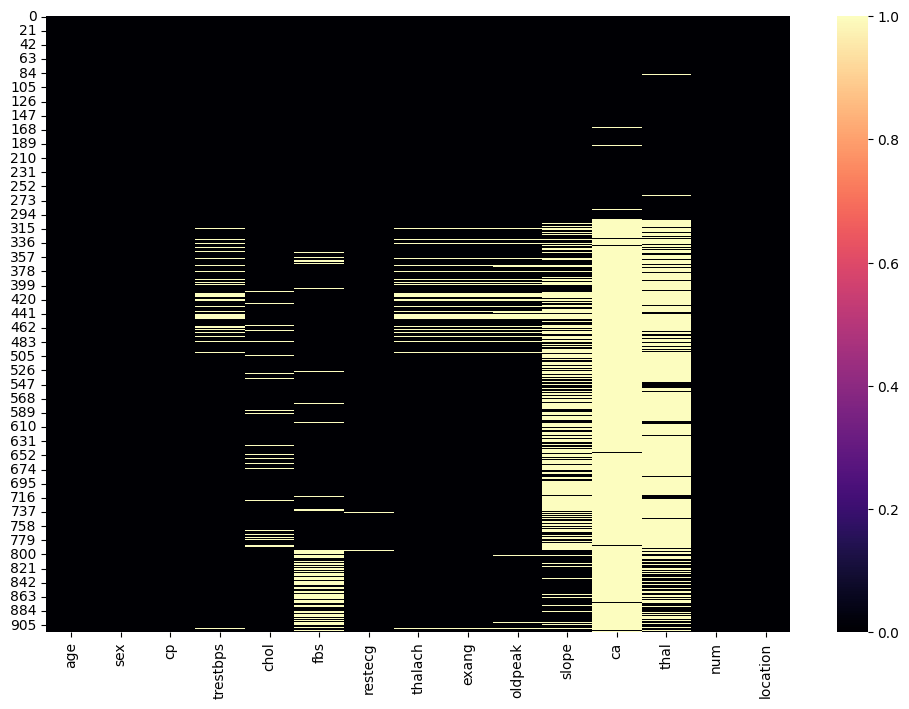

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_no_dup.isna(), cmap="magma")
plt.show()

In [20]:
nan_stats = pd.DataFrame(df_no_dup.isna().sum(), columns=["NaN_Count"])
nan_stats["NaN_Percent"] = np.round(nan_stats["NaN_Count"]/df_no_dup.shape[0], 4)*100
nan_stats["NaN_Percent"] = nan_stats["NaN_Percent"].astype(str) + "%"
nan_stats

,NaN_Count,NaN_Percent
age,0,0.0%
sex,0,0.0%
cp,0,0.0%
trestbps,59,6.460000000000001%
chol,29,3.17%
fbs,89,9.74%
restecg,2,0.22%
thalach,55,6.02%
exang,55,6.02%
oldpeak,62,6.78%


### Impute Missing Values

In [21]:
# Columns to impute
continuous_cols  = ["trestbps", "chol", "thalach", "oldpeak"] # Continuous variables will be imputed using MICE
categorical_cols = ["fbs", "restecg", "exang", "slope", "ca", "thal"] # Categorical variables will be imputed using KNN

df_half_clean = df_no_dup.copy()

*MICE (For Continuous Columns)*

In [22]:
df_before_MICE = df_half_clean.copy()

# Utilize continuous variables and columns with no missing values
df_after_MICE = df_before_MICE[continuous_cols + ["age", "sex", "cp", "num", "location"]]

# Scale features using RobustScaler
rob_scaler = RobustScaler()
X_rob_scaled = pd.DataFrame(rob_scaler.fit_transform(df_before_MICE), columns=df_before_MICE.columns, index=df_before_MICE.index)

# Perform MICE imputation
mice_imputer = IterativeImputer(random_state=42, max_iter=50)
X_scaled_mice = pd.DataFrame(mice_imputer.fit_transform(X_rob_scaled), 
                             columns=X_rob_scaled.columns, index=X_rob_scaled.index)

# Function to inverse the scale transform of the data
def inverse_scale(data):
    return pd.DataFrame(rob_scaler.inverse_transform(data), columns=data.columns, index=data.index)

# Replace original missing (continuous) values with imputed values
df_after_MICE.loc[X_rob_scaled.index, continuous_cols] = inverse_scale(X_scaled_mice)

In [23]:
# Statistical summary of the pre-imputed data
summary_before_MICE = df_before_MICE[continuous_cols].describe()
print("Statistical Summary of Continuous Columns Missing Values BEFORE MICE Imputation:\n")
summary_before_MICE

Statistical Summary of Continuous Columns Missing Values BEFORE MICE Imputation:



,trestbps,chol,thalach,oldpeak
count,855.000000,885.000000,859.000000,852.000000
mean,132.147368,199.124294,137.529686,0.877934
std,19.056966,110.823615,25.949655,1.090298
min,0.000000,0.000000,60.000000,-2.600000
25%,120.000000,175.000000,120.000000,0.000000
50%,130.000000,223.000000,140.000000,0.500000
75%,140.000000,268.000000,157.000000,1.500000
max,200.000000,603.000000,202.000000,6.200000


In [24]:
# Statistical summary of the MICE-imputed data
summary_after_MICE = df_after_MICE[continuous_cols].describe()
print("Statistical Summary of Continuous Columns Missing Values AFTER MICE Imputation:\n")
summary_after_MICE

Statistical Summary of Continuous Columns Missing Values AFTER MICE Imputation:



,trestbps,chol,thalach,oldpeak
count,914.000000,914.000000,914.000000,914.000000
mean,132.431687,198.952517,136.849689,0.878186
std,18.520503,109.228563,25.440402,1.061222
min,0.000000,0.000000,60.000000,-2.600000
25%,120.000000,175.000000,120.000000,0.000000
50%,130.000000,222.000000,138.000000,0.593185
75%,140.000000,267.000000,156.000000,1.500000
max,200.000000,603.000000,202.000000,6.200000


In [25]:
df_half_clean[continuous_cols] = df_after_MICE[continuous_cols]

nan_stats = pd.DataFrame(df_half_clean.isna().sum(), columns=["NaN_Count"])
nan_stats["NaN_Percent"] = np.round(nan_stats["NaN_Count"]/df_half_clean.shape[0], 4)*100
nan_stats["NaN_Percent"] = nan_stats["NaN_Percent"].astype(str) + "%"
nan_stats

,NaN_Count,NaN_Percent
age,0,0.0%
sex,0,0.0%
cp,0,0.0%
trestbps,0,0.0%
chol,0,0.0%
fbs,89,9.74%
restecg,2,0.22%
thalach,0,0.0%
exang,55,6.02%
oldpeak,0,0.0%


*KNN (For Categorical Columns)*

In [26]:
df_before_KNN = df_half_clean.copy()

# Utilize the entire dataset
df_after_KNN = df_before_KNN.copy()

# Scale features using StandardScaler
std_scaler = StandardScaler()
X_std_scaled = pd.DataFrame(std_scaler.fit_transform(df_before_KNN), columns=df_before_KNN.columns, index=df_before_KNN.index)

# Perform KNN imputation
knn_imputer = KNNImputer(n_neighbors=1)
X_scaled_knn = pd.DataFrame(knn_imputer.fit_transform(X_std_scaled), 
                            columns=X_std_scaled.columns, index=X_std_scaled.index)

# Function to inverse the scale transform of the data
def inverse_scale(data):
    return pd.DataFrame(std_scaler.inverse_transform(data), columns=data.columns, index=data.index)

# Replace original missing (categorical) values with imputed values
df_after_KNN = inverse_scale(X_scaled_knn)

In [27]:
# Statistical summary of the pre-imputed data
summary_before_KNN = df_before_KNN[categorical_cols].describe()
print("Statistical Summary of Continuous Columns Missing Values BEFORE KNN Imputation:\n")
summary_before_KNN

Statistical Summary of Continuous Columns Missing Values BEFORE KNN Imputation:



,fbs,restecg,exang,slope,ca,thal
count,825.000000,912.000000,859.000000,608.000000,308.000000,433.000000
mean,0.166061,0.604167,0.389988,1.769737,0.678571,5.085450
std,0.372361,0.806195,0.488031,0.617914,0.936378,1.920792
min,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,0.000000,0.000000,0.000000,2.000000,0.000000,6.000000
75%,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000
max,1.000000,2.000000,1.000000,3.000000,3.000000,7.000000


In [28]:
# Statistical summary of the KNN-imputed data
summary_after_KNN = df_after_KNN[categorical_cols].describe()
print("Statistical Summary of Continuous Columns Missing Values AFTER KNN Imputation:\n")
summary_after_KNN

Statistical Summary of Continuous Columns Missing Values AFTER KNN Imputation:



,fbs,restecg,exang,slope,ca,thal
count,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000
mean,0.170678,0.603939,0.404814,1.723195,0.622538,5.344639
std,0.376434,0.805666,0.491125,0.602085,0.874850,1.849910
min,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,0.000000,0.000000,0.000000,2.000000,0.000000,6.000000
75%,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000
max,1.000000,2.000000,1.000000,3.000000,3.000000,7.000000


In [29]:
df_clean = df_after_KNN.copy()

nan_stats = pd.DataFrame(df_clean.isna().sum(), columns=["NaN_Count"])
nan_stats["NaN_Percent"] = np.round(nan_stats["NaN_Count"]/df_clean.shape[0], 4)*100
nan_stats["NaN_Percent"] = nan_stats["NaN_Percent"].astype(str) + "%"
nan_stats

,NaN_Count,NaN_Percent
age,0,0.0%
sex,0,0.0%
cp,0,0.0%
trestbps,0,0.0%
chol,0,0.0%
fbs,0,0.0%
restecg,0,0.0%
thalach,0,0.0%
exang,0,0.0%
oldpeak,0,0.0%


In [30]:
print("All Categorical Variables Were Imputed Correctly (No Decimals and Within Respective Range of Values)")
print(f"Unique Values of \"fbs\" Variable: {np.sort(df_clean['fbs'].unique())}")
print(f"Unique Values of \"restecg\" Variable: {np.sort(df_clean['restecg'].unique())}")
print(f"Unique Values of \"exang\" Variable: {np.sort(df_clean['exang'].unique())}")
print(f"Unique Values of \"slope\" Variable: {np.sort(df_clean['slope'].unique())}")
print(f"Unique Values of \"ca\" Variable: {np.sort(df_clean['ca'].unique())}")
print(f"Unique Values of \"thal\" Variable: {np.sort(df_clean['thal'].unique())}")

All Categorical Variables Were Imputed Correctly (No Decimals and Within Respective Range of Values)
Unique Values of "fbs" Variable: [0. 1.]
Unique Values of "restecg" Variable: [0. 1. 2.]
Unique Values of "exang" Variable: [0. 1.]
Unique Values of "slope" Variable: [1. 2. 3.]
Unique Values of "ca" Variable: [0. 1. 2. 3.]
Unique Values of "thal" Variable: [3. 6. 7.]
Unique Values of "exang" Variable: [0. 1.]
Unique Values of "slope" Variable: [1. 2. 3.]
Unique Values of "ca" Variable: [0. 1. 2. 3.]
Unique Values of "thal" Variable: [3. 6. 7.]


#### Assign Proper Data Types

In [31]:
df_clean = df_clean.astype({"age": float, "sex": int, "cp": int, "trestbps": float, "chol": float, 
                            "fbs": int, "restecg": int, "thalach": float, "exang": int, "oldpeak": float, 
                            "slope": int, "ca": int, "thal": int, "num": int, "location": int})

df_clean.info() # Appropriate Data Types

<class 'pandas.core.frame.DataFrame'>
Index: 914 entries, 0 to 915
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       914 non-null    float64
 1   sex       914 non-null    int64  
 2   cp        914 non-null    int64  
 3   trestbps  914 non-null    float64
 4   chol      914 non-null    float64
 5   fbs       914 non-null    int64  
 6   restecg   914 non-null    int64  
 7   thalach   914 non-null    float64
 8   exang     914 non-null    int64  
 9   oldpeak   914 non-null    float64
 10  slope     914 non-null    int64  
 11  ca        914 non-null    int64  
 12  thal      914 non-null    int64  
 13  num       914 non-null    int64  
 14  location  914 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 146.5 KB


#### Correlation and Outliers Analysis

In [32]:
col_names = list(df_no_dup.columns)
corr_matrix = np.round(df_no_dup.corr().values, 2)

fig_heatmap = ff.create_annotated_heatmap(
    z=corr_matrix,
    x=col_names,
    y=col_names,
    colorscale="bluered"
)
fig_heatmap.update_layout(
    title="Correlation Heatmap Before MICE and KNN Imputation",
)
fig_heatmap.show()

In [33]:
col_names = list(df_clean.columns)
corr_matrix = np.round(df_clean.corr().values, 2)

fig_heatmap = ff.create_annotated_heatmap(
    z=corr_matrix,
    x=col_names,
    y=col_names,
    colorscale="bluered"
)
fig_heatmap.update_layout(
    title="Correlation Heatmap After MICE and KNN Imputation",
)
fig_heatmap.show()

In [34]:
plot_df = df_no_dup[["age"]+continuous_cols].melt(var_name="variable", value_name="value")

fig_box = px.box(plot_df, x="variable", y="value", 
                 title="Box Plot of Continuous Variables Before MICE Imputation")

fig_box.update_layout(xaxis_title="Continuous Variable", yaxis_title="Value",
                      yaxis=dict(range=[-25, None]))

fig_box.show()

In [35]:
plot_df = df_clean[["age"]+continuous_cols].melt(var_name="variable", value_name="value")

fig_box = px.box(plot_df, x="variable", y="value", 
                 title="Box Plot of Continuous Variables After MICE Imputation")

fig_box.update_layout(xaxis_title="Continuous Variable", yaxis_title="Value",
                      yaxis=dict(range=[-25, None]))

fig_box.show()

### Visualizations (EDA)

In [36]:
# Unique num values
num_categories = sorted(df_clean["num"].unique())

# Count occurrences of each (num, location) pair
counts = pd.crosstab(df_clean["num"], df_clean["location"]).reindex(index=num_categories)

# Re-assign city names to previously encoded "location" variable in "counts" DataFrame
location_dict = location_encode.to_dict()
counts.rename(columns=dict(zip(location_dict["location_encoded"].values(), location_dict["location_str"].values())), 
              inplace=True)

# Build grouped bar chart: x-axis = stages (num), separate bar trace for each source
fig_bar_chart = go.Figure()
for src_name in counts.columns:
    fig_bar_chart.add_trace(go.Bar(
        x=[str(i) for i in counts.index],
        y=counts[src_name].values,
        name=str(src_name),
        hovertemplate="Stage: %{x}<br>Source: " + str(src_name) + "<br>Count: %{y}<extra></extra>"
    ))

fig_bar_chart.update_layout(
    title="Distribution of Heart Disease Stage by Location",
    xaxis_title="Heart Disease Stage",
    yaxis_title="Count",
    legend_title="Location",
)

fig_bar_chart.show()

In [37]:
fig_scatter = px.scatter(df_clean, x="age", y="thalach", color="num", trendline="ols", 
                         color_continuous_scale="turbo", 
                         labels={"age":"Age", "thalach":"Max Heart Rate", "num":"Disease Stage"}, 
                         title="Scatter Plot of Age vs Maximum Heart Rate Achieved")
fig_scatter.show()

In [38]:
fig_violin = px.violin(df_clean, x="num", y="oldpeak", box=True, points="all", 
                       labels={"num":"Heart Disease Stage", "oldpeak":"Oldpeak"}, 
                       title="Violin Plot of Heart Disease Stage vs Blood Flow to Heart During Physical Exertion (Oldpeak)")
fig_violin.show()

In [39]:
# Define categorical variables
categorical_vars = {"sex": "Gender", "cp": "Chest Pain Type",
                    "fbs": "Fasting Blood Sugar > 120", "restecg": "Resting ECG Results",
                    "exang": "Exercise Induced Angina", "slope": "ST Segment Slope",
                    "ca": "Number of Major Vessels","thal": "Thallium Stress Test Results"}

# Create subplots with 2 rows and 4 columns
fig_categorical = make_subplots(rows=2, cols=4,
                                subplot_titles=[f"{k.upper()}<br>{v}" for k, v in categorical_vars.items()],
                                specs=[[{"type": "bar"}, {"type": "bar"}, {"type": "bar"}, {"type": "bar"}],
                                       [{"type": "bar"}, {"type": "bar"}, {"type": "bar"}, {"type": "bar"}]])

# Color palette
colors = px.colors.qualitative.Set2
# Add bar charts for each categorical variable
col_idx = 1
for row_num in [1, 2]:
    for col_num in [1, 2, 3, 4]:
        if col_idx <= len(categorical_vars):
            var_name = list(categorical_vars.keys())[col_idx - 1]
            # Calculate value counts
            value_counts = df_clean[var_name].value_counts().sort_index()
            # Add trace
            fig_categorical.add_trace(go.Bar(x=[f"{x}" for x in value_counts.index], y=value_counts.values,
                                                marker_color=colors[(col_idx - 1) % len(colors)], showlegend=False,
                                                hovertemplate=f"<b>{var_name.upper()}</b><br>Category: %{{x}}<br>Count: %{{y}}<extra></extra>"),
                                                row=row_num, col=col_num)
            col_idx += 1

# Update layout
fig_categorical.update_layout(title_text="Distribution of All Categorical Variables in Dataset", height=600)

# Update y-axis labels
fig_categorical.update_yaxes(title_text="Count", row=1, col=1)
fig_categorical.update_yaxes(title_text="Count", row=2, col=1)

fig_categorical.show()

In [40]:
fig_parallel = px.parallel_coordinates(df_clean, 
                                       dimensions=["age", "trestbps", "chol", "thalach", "oldpeak"],
                                       color="num",
                                       color_continuous_scale="turbo",
                                       labels={"age":"Age", "trestbps":"Resting BP", "chol":"Cholesterol",
                                               "thalach":"Max Heart Rate", "oldpeak":"Oldpeak", "num":"Disease Stage"},
                                       title="Parallel Coordinates Plot of All Continuous Variables in Dataset")

fig_parallel.show()

### Feature Engineering

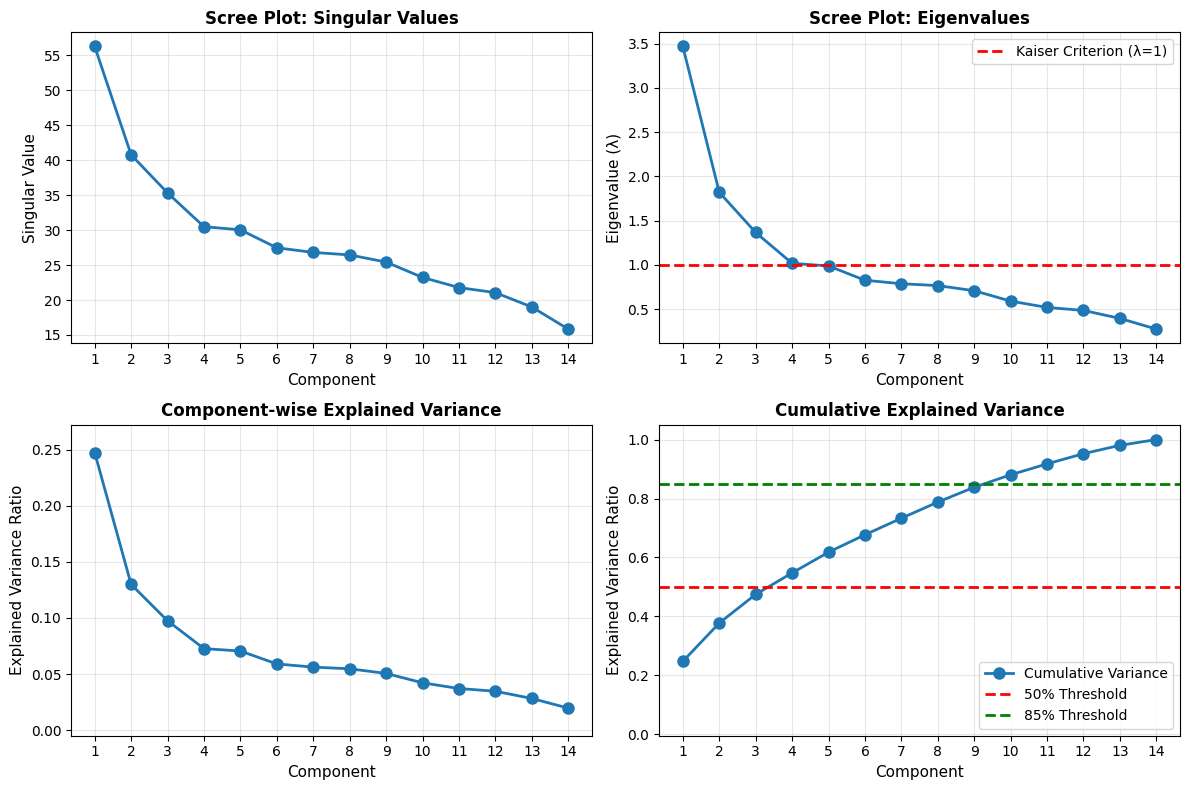

In [41]:
# Select only predictor variables (exclude 'num' for PCA)
X = df_clean.drop(columns=["num"])

# Standardize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform SVD
U, s, Vt = np.linalg.svd(X_scaled, full_matrices=True)

# Calculate explained variance ratios
eigenvalues = s**2 / (len(X_scaled) - 1)
explained_variance_ratio = eigenvalues / eigenvalues.sum()

plt.figure(figsize=(12, 8))

# Singular values scree plot
plt.subplot(2, 2, 1)
plt.plot(range(1, len(s)+1), s, 'o-', linewidth=2, markersize=8)
plt.xlabel('Component', fontsize=11)
plt.ylabel('Singular Value', fontsize=11)
plt.title('Scree Plot: Singular Values', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(s)+1))

# Eigenvalues scree plot
plt.subplot(2, 2, 2)
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, 'o-', linewidth=2, markersize=8)
plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label='Kaiser Criterion (λ=1)')
plt.xlabel('Component', fontsize=11)
plt.ylabel('Eigenvalue (λ)', fontsize=11)
plt.title('Scree Plot: Eigenvalues', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(eigenvalues)+1))
plt.legend()

# Individual variance explained
plt.subplot(2, 2, 3)
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, 'o-', 
         linewidth=2, markersize=8)
plt.xlabel('Component', fontsize=11)
plt.ylabel('Explained Variance Ratio', fontsize=11)
plt.title('Component-wise Explained Variance', fontsize=12, fontweight='bold')
plt.ylim(-0.005, max(explained_variance_ratio) * 1.1)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(s)+1))

# Cumulative variance plot
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.subplot(2, 2, 4)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'o-', 
         linewidth=2, markersize=8, label='Cumulative Variance')
plt.axhline(y=0.50, color='red', linestyle='--', linewidth=2, label='50% Threshold')
plt.axhline(y=0.85, color='green', linestyle='--', linewidth=2, label='85% Threshold')
plt.xlabel('Component', fontsize=11)
plt.ylabel('Explained Variance Ratio', fontsize=11)
plt.title('Cumulative Explained Variance', fontsize=12, fontweight='bold')
plt.ylim(-0.005, 1.05)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(s)+1))
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [42]:
print("Component-wise Explained Variance:")
for i in range(len(explained_variance_ratio)):
    print(f"PC{i+1} → {explained_variance_ratio[i]:.4f} ({explained_variance_ratio[i]*100:.2f}%)")

print("\nCumulative Explained Variance:")
print(f"Component 1 explains {cumulative_variance[0]:.4f} ({cumulative_variance[0]*100:.2f}%) of variance")
for i in range(1, len(cumulative_variance)):
    print(f"Components 1-{i+1} explain {cumulative_variance[i]:.4f} ({cumulative_variance[i]*100:.2f}%) of variance")

Component-wise Explained Variance:
PC1 → 0.2474 (24.74%)
PC2 → 0.1299 (12.99%)
PC3 → 0.0975 (9.75%)
PC4 → 0.0726 (7.26%)
PC5 → 0.0705 (7.05%)
PC6 → 0.0590 (5.90%)
PC7 → 0.0562 (5.62%)
PC8 → 0.0547 (5.47%)
PC9 → 0.0505 (5.05%)
PC10 → 0.0422 (4.22%)
PC11 → 0.0371 (3.71%)
PC12 → 0.0347 (3.47%)
PC13 → 0.0282 (2.82%)
PC14 → 0.0196 (1.96%)

Cumulative Explained Variance:
Component 1 explains 0.2474 (24.74%) of variance
Components 1-2 explain 0.3773 (37.73%) of variance
Components 1-3 explain 0.4747 (47.47%) of variance
Components 1-4 explain 0.5474 (54.74%) of variance
Components 1-5 explain 0.6179 (61.79%) of variance
Components 1-6 explain 0.6769 (67.69%) of variance
Components 1-7 explain 0.7331 (73.31%) of variance
Components 1-8 explain 0.7877 (78.77%) of variance
Components 1-9 explain 0.8383 (83.83%) of variance
Components 1-10 explain 0.8804 (88.04%) of variance
Components 1-11 explain 0.9175 (91.75%) of variance
Components 1-12 explain 0.9522 (95.22%) of variance
Components 1-13 exp

### Classification Models

*User-defined Parameters (PCs and Train-Test Split)*

In [43]:
n_components = 4 # (I recommend 4 PCs)
user_test_size = 0.25 # (I recommend 75-25 split)
user_rand_state = 42 # (I recommend 42)

In [44]:
# User-defined principal components to create PCA dataset
V = Vt[:n_components, :].T
X_pca = X_scaled @ V

print(f"PCA Dataset Created:")
print(f"Original dimensions → {X_scaled.shape}")
print(f"Reduced dimensions → {X_pca.shape}")
print(f"Variance retained → {cumulative_variance[n_components-1]*100:.2f}%")

# User-defined split of data into training and testing sets
y = df_clean["num"].copy()
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=user_test_size, random_state=user_rand_state, stratify=y)

print(f"\nTrain-Test Split:")
print(f"Training set size → {X_train_pca.shape[0]}")
print(f"Testing set size → {X_test_pca.shape[0]}")

PCA Dataset Created:
Original dimensions → (914, 14)
Reduced dimensions → (914, 4)
Variance retained → 54.74%

Train-Test Split:
Training set size → 685
Testing set size → 229


*Development (Logistic Regression, Random Forest Classifier, XGB Classifier)*

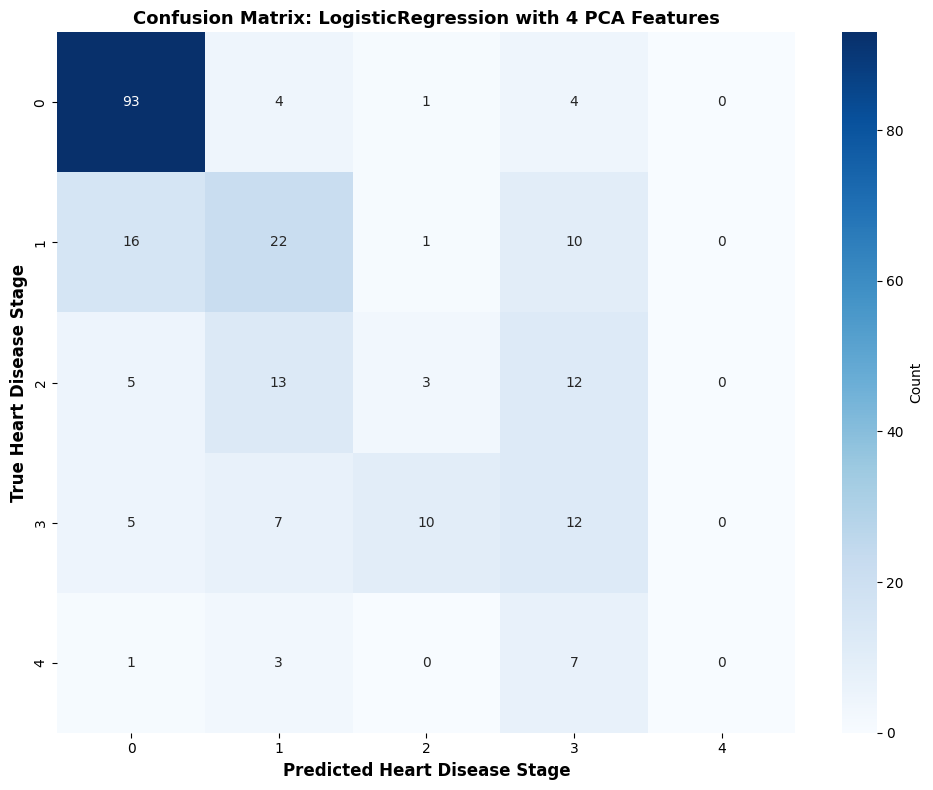

In [45]:
# Train LogisticRegression model
log_reg_pca = LogisticRegression(
    max_iter=10000, 
    solver='lbfgs',
    random_state=user_rand_state
)
log_reg_pca.fit(X_train_pca, y_train)

# Make predictions on test set
y_pred_pca = log_reg_pca.predict(X_test_pca)

# Visualize confusion matrix as heatmap
cm_pca = confusion_matrix(y_test, y_pred_pca)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.sort(y.unique()),
            yticklabels=np.sort(y.unique()),
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Heart Disease Stage', fontsize=12, fontweight='bold')
plt.ylabel('True Heart Disease Stage', fontsize=12, fontweight='bold')
plt.title(f"Confusion Matrix: LogisticRegression with {n_components} PCA Features", 
          fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

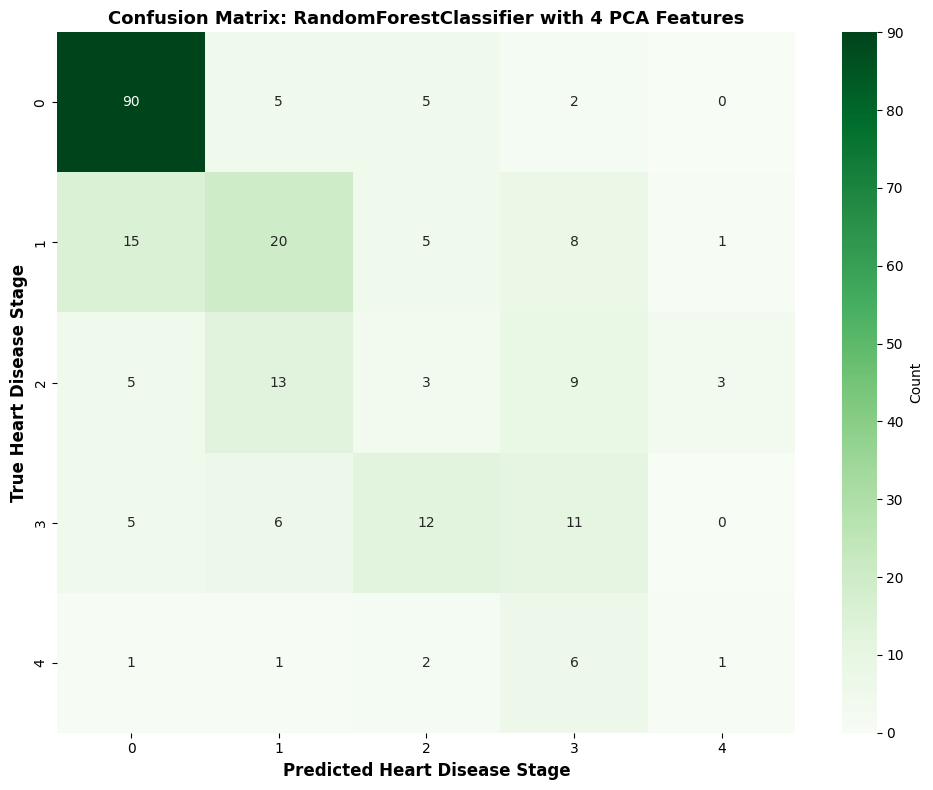

In [46]:
# Train RandomForestClassifier model
rf_pca = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    n_jobs=-1,
    random_state=user_rand_state
)
rf_pca.fit(X_train_pca, y_train)

# Make predictions on test set
y_pred_rf = rf_pca.predict(X_test_pca)

# Visualize confusion matrix as heatmap
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=np.sort(y.unique()),
            yticklabels=np.sort(y.unique()),
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Heart Disease Stage', fontsize=12, fontweight='bold')
plt.ylabel('True Heart Disease Stage', fontsize=12, fontweight='bold')
plt.title(f"Confusion Matrix: RandomForestClassifier with {n_components} PCA Features", 
          fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

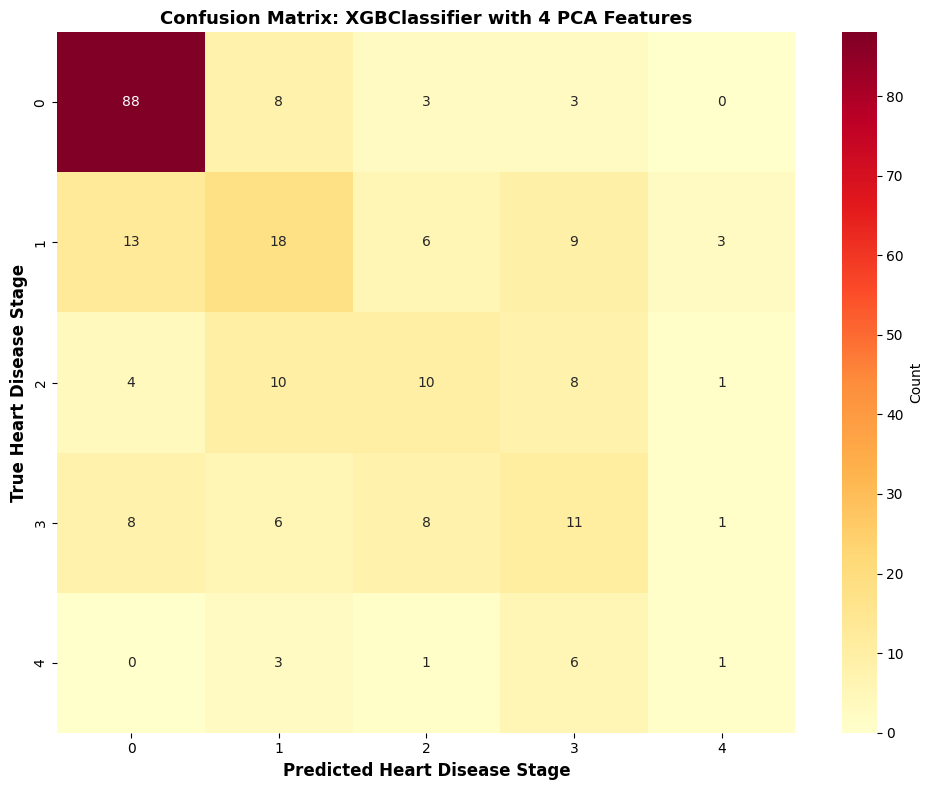

In [47]:
# Train XGBClassifier model
xgb_pca = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    eval_metric='mlogloss',
    random_state=user_rand_state
)
xgb_pca.fit(X_train_pca, y_train)

# Make predictions on test set
y_pred_xgb = xgb_pca.predict(X_test_pca)

# Visualize confusion matrix as heatmap
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='YlOrRd', 
            xticklabels=np.sort(y.unique()),
            yticklabels=np.sort(y.unique()),
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Heart Disease Stage', fontsize=12, fontweight='bold')
plt.ylabel('True Heart Disease Stage', fontsize=12, fontweight='bold')
plt.title(f"Confusion Matrix: XGBClassifier with {n_components} PCA Features", 
          fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

*Evaluation (Logistic Regression, Random Forest Classifier, XGBoost Classifier)*

In [48]:
# Classification reports
print(f"\nLOGISTIC REGRESSION MODEL ({n_components} PCs) Classification Report:")
print(classification_report(y_test, y_pred_pca, zero_division=0.0,
                            target_names=[f'Stage {i}' for i in np.sort(y.unique())]))

print(f"\nRANDOM FOREST CLASSIFIER MODEL ({n_components} PCs) Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0.0,
                            target_names=[f'Stage {i}' for i in np.sort(y.unique())]))

print(f"\nXGBOOST CLASSIFIER MODEL ({n_components} PCs) Classification Report:")
print(classification_report(y_test, y_pred_xgb, zero_division=0.0,
                            target_names=[f'Stage {i}' for i in np.sort(y.unique())]))


LOGISTIC REGRESSION MODEL (4 PCs) Classification Report:
              precision    recall  f1-score   support

     Stage 0       0.78      0.91      0.84       102
     Stage 1       0.45      0.45      0.45        49
     Stage 2       0.20      0.09      0.12        33
     Stage 3       0.27      0.35      0.30        34
     Stage 4       0.00      0.00      0.00        11

    accuracy                           0.57       229
   macro avg       0.34      0.36      0.34       229
weighted avg       0.51      0.57      0.53       229


RANDOM FOREST CLASSIFIER MODEL (4 PCs) Classification Report:
              precision    recall  f1-score   support

     Stage 0       0.78      0.88      0.83       102
     Stage 1       0.44      0.41      0.43        49
     Stage 2       0.11      0.09      0.10        33
     Stage 3       0.31      0.32      0.31        34
     Stage 4       0.20      0.09      0.12        11

    accuracy                           0.55       229
   macro a